<h1> Assignment for EOSC 511 Lab 4</h1>
Written by Megan Miller
Note this code was written in VS code

In [2]:
#Importing required items

import context
from numlabs.lab4.lab4_functions import initinter41, eulerinter41, midpointinter41, rk4ODEinter41, rkckODEinter41
import numpy as np
import matplotlib.pyplot as plt

******************************
context imported. Front of path:
C:\Users\megan\repos\numeric_2022
back of path: C:\Users\megan\AppData\Roaming\Python\Python310\site-packages
******************************

through c:\Users\megan\repos\numeric_2022\notebooks\lab4\context.py


<h2> Problem Runge Kutta4</h2>

Questions:

1.  Based on the numerical solutions of ([eq:test](#eq:test)), which of the
    three methods appears more accurate?

2.  Again determine how the error changes relative to the change in
    stepsize, as the stepsize is halved.

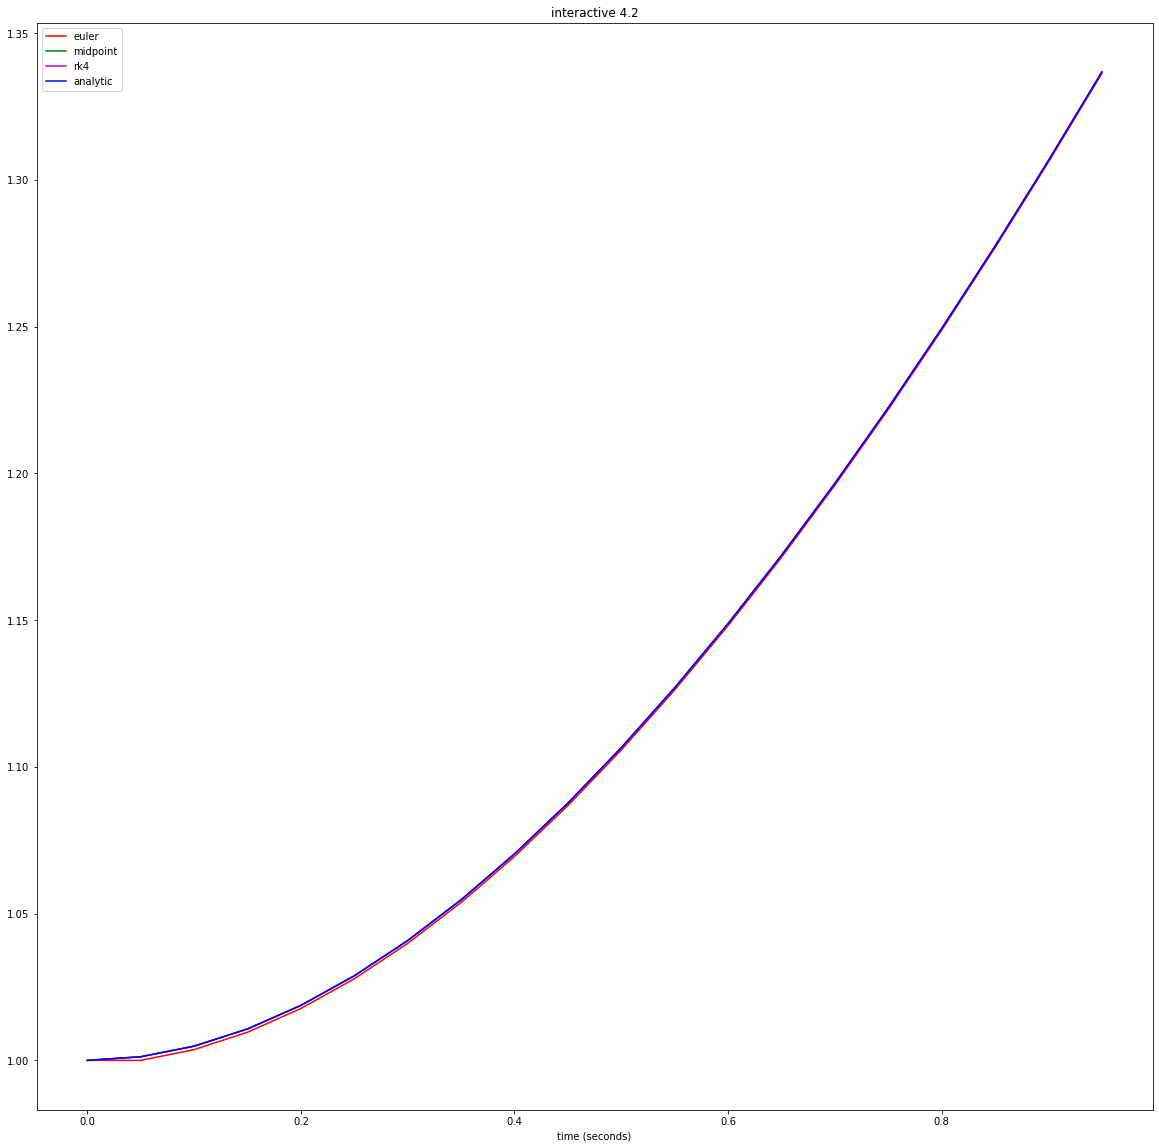

In [3]:
initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.05,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)
timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)
ye=[]
ym=[]
yrk=[]
y=coeff.yinitial
ye.append(coeff.yinitial)
ym.append(coeff.yinitial)
yrk.append(coeff.yinitial)
for i in np.arange(1,nsteps):
    ynew=eulerinter41(coeff,y,timeVec[i-1])
    ye.append(ynew)
    ynew=midpointinter41(coeff,y,timeVec[i-1])
    ym.append(ynew)
    ynew=rk4ODEinter41(coeff,y,timeVec[i-1])
    yrk.append(ynew)
    y=ynew
analytic=timeVec + np.exp(-timeVec)

#Renaming calculated values so calculations being reused in following cells do not create problems
ym_1=ym
yrk_1=yrk
ye_1=ye
analytic_1=analytic
timeVec_1=timeVec


theFig=plt.figure(0, figsize=(20,20)) #zoomed in to see which method "appears" more accurate.
theFig.clf() #.clf() is to clear the current figure
theAx=theFig.add_subplot(111)

theAx.set_xlabel('time (seconds)')
l2=theAx.plot(timeVec,ye,'r-',label='euler')
l3=theAx.plot(timeVec,ym,'g-',label='midpoint')
l4=theAx.plot(timeVec,yrk,'m-',label='rk4')
l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
theAx.legend(loc='best')
theAx.set_title('interactive 4.2');

Response:
1. Without changing the time step or zooming in significantly, all the methods appear consistent with the analytical solution. However, by zooming in and turning on and off the various methods, it appears that the runge kutta 4 and mid-point method are the most accurate, cannot be discerned from the analytical solution.  The Euler method is less accurate (under estimate) especially for time periods between ~0.05 and 0.3 

The code below does a quick analysis of the error associated with each method.  Based on these calculations it appears as though there is no difference between the runge kutta 4 method and the analytical soloution.

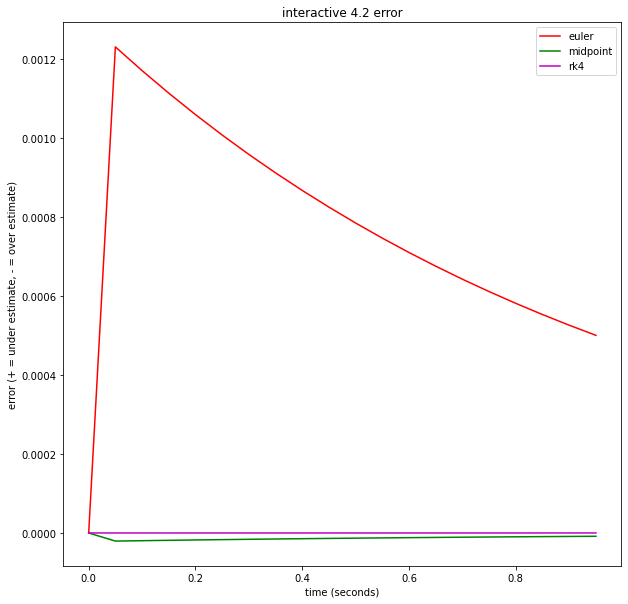

In [4]:
#Calculating the error for the different methods

#Calculating the error between the analytical soloution and the numeric methods; error = analytic - numeric
ye_O=analytic_1-ye_1
ym_O=analytic_1-ym_1
yrk_O=analytic_1-yrk_1

#Plot the error value
theFig=plt.figure(0, figsize=(10,10))
theFig.clf() #.clf() is to clear the current figure
theAx=theFig.add_subplot(111)

theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('error (+ = under estimate, - = over estimate)')
l2=theAx.plot(timeVec_1,ye_O,'r-',label='euler')
l3=theAx.plot(timeVec_1,ym_O,'g-',label='midpoint')
l4=theAx.plot(timeVec_1,yrk_O,'m-',label='rk4')
theAx.legend(loc='best')
theAx.set_title('interactive 4.2 error');

Response 2

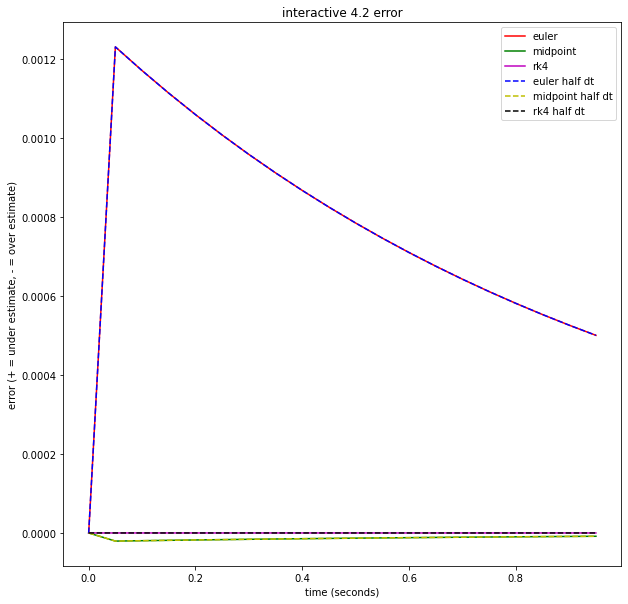

In [5]:
#Redoing the calculations for the numerical methods and analytical soloution with half dt
initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.025,'c1':-1.,'c2':1.,'c3':1.}
timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)
ye=[]
ym=[]
yrk=[]
y=coeff.yinitial
ye.append(coeff.yinitial)
ym.append(coeff.yinitial)
yrk.append(coeff.yinitial)
for i in np.arange(1,nsteps):
    ynew=eulerinter41(coeff,y,timeVec[i-1])
    ye.append(ynew)
    ynew=midpointinter41(coeff,y,timeVec[i-1])
    ym.append(ynew)
    ynew=rk4ODEinter41(coeff,y,timeVec[i-1])
    yrk.append(ynew)
    y=ynew
analytic=timeVec + np.exp(-timeVec)

#Calculation the error associated with dt/2

ye_O_halfdt=analytic-ye
ym_O_halfdt=analytic-ym
yrk_O_halfdt=analytic-yrk

#plotting error values on previous plot
#Plot the error value
theFig=plt.figure(0, figsize=(10,10))
theFig.clf() #.clf() is to clear the current figure
theAx=theFig.add_subplot(111)

theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('error (+ = under estimate, - = over estimate)')
l2=theAx.plot(timeVec_1,ye_O,'r-',label='euler')
l3=theAx.plot(timeVec_1,ym_O,'g-',label='midpoint')
l4=theAx.plot(timeVec_1,yrk_O,'m-',label='rk4')
l5=theAx.plot(timeVec,ye_O_halfdt,'b--',label='euler half dt')
l6=theAx.plot(timeVec,ym_O_halfdt,'y--',label='midpoint half dt')
l7=theAx.plot(timeVec,yrk_O_halfdt,'k--',label='rk4 half dt')
theAx.legend(loc='best')
theAx.set_title('interactive 4.2 error');

based on the graph above it appears as though halving the time step (from 0.05 to 0.025) has no effect on the magnitude or direction (over estimate vs under estimate) associated with the runge kutta 4, midpoint or euler methods for this function.

<h2> Problem Embedded</h2>
<h3>Problem statement</h3>
Though the error estimate is for the embedded fourth-order Runge-Kutta method, the fifth-order method can be used in practice for calculating the solution, the assumption being the fifth-order method should be at least as accurate as the fourth-order method. In the demo below, compare solutions of the test problem eq:test2

eq:test2  𝑑𝑦/𝑑𝑡=−𝑦+𝑡+1,𝑦(0)=1

generated by the fifth-order method with solutions generated by the standard fourth-order Runge-Kutta method. Which method is more accurate? Again, determine how the error decreases as you halve the stepsizes. 


<h3> Response </h3>

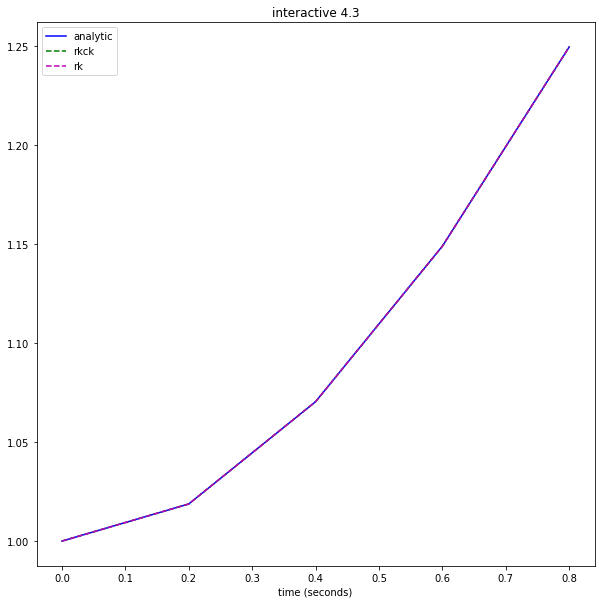

In [6]:
initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.2,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)

timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)
ye=[]
ym=[]
yrk=[]
yrkck=[]
y1=coeff.yinitial
y2=coeff.yinitial
yrk.append(coeff.yinitial)
yrkck.append(coeff.yinitial)
for i in np.arange(1,nsteps):
    ynew=rk4ODEinter41(coeff,y1,timeVec[i-1])
    yrk.append(ynew)
    y1=ynew 
    ynew=rkckODEinter41(coeff,y2,timeVec[i-1])
    yrkck.append(ynew)
    y2=ynew 
analytic=timeVec + np.exp(-timeVec)
theFig,theAx=plt.subplots(1,1, figsize=(10,10)) #making figure bigger to see the error.
l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
theAx.set_xlabel('time (seconds)')
l2=theAx.plot(timeVec,yrkck,'g--',label='rkck')
l3=theAx.plot(timeVec,yrk,'m--',label='rk')
theAx.legend(loc='best')
theAx.set_title('interactive 4.3');

#Renaming calculated values so calculations being reused do not create problems when trying to graph below
yrkck_02=yrkck
yrk_02=yrk
analytic_02=analytic
timeVec_02=timeVec

Calculating the error for the initial time step and half the time step then graphing to compare, as it is not possible to discern any error it the figure plotted above.

At 0.8s the error for the 4th order Runge-Kutta method is -3.3e-07 and 1e-08 for dt of 0.1 and 0.2 respectively. Which means halving dt results in the magnitude of error increasing by a factor of23
At 0.8s the error for the 5th order Runge-Kutta method is 4.7e-10 and 1e-08 for dt of 0.1 and 0.2 respectively. Which means halving dt results in reducing the error by approximately two orders of magnitude


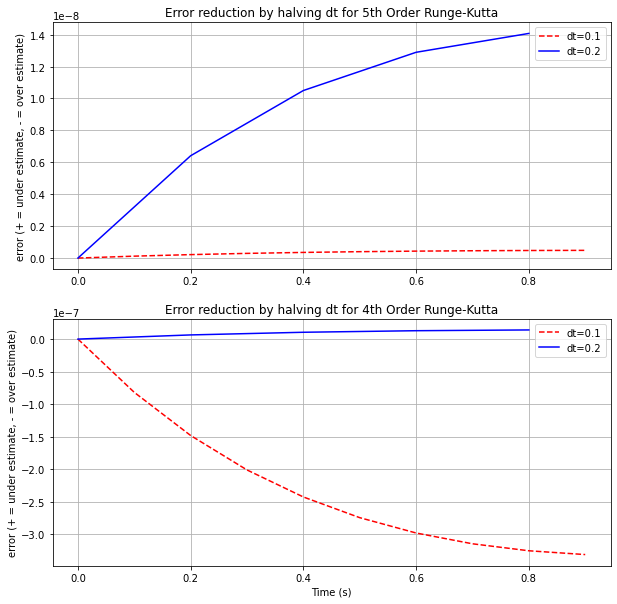

In [7]:
#Calculative values for half time step and plotting
initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.1,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)

timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)
ye=[]
ym=[]
yrk=[]
yrkck=[]
y1=coeff.yinitial
y2=coeff.yinitial
yrk.append(coeff.yinitial)
yrkck.append(coeff.yinitial)
for i in np.arange(1,nsteps):
    ynew=rk4ODEinter41(coeff,y1,timeVec[i-1])
    yrk.append(ynew)
    y1=ynew 
    ynew=rkckODEinter41(coeff,y2,timeVec[i-1])
    yrkck.append(ynew)
    y2=ynew 
analytic=timeVec + np.exp(-timeVec)

#Calculating error

error_yrk_01=analytic-yrk
error_yrkck_01=analytic-yrkck
error_yrk_02=analytic_02-yrkck_02
error_yrkck_02=analytic_02-yrkck_02

#Plotting errors, one subplot for runge-kutta 4th order method and one subplot for runge-kutta 5th order method.
figError, (ax1, ax2)=plt.subplots(2,1, figsize=(10,10))

ax1.plot(timeVec,error_yrkck_01,"r--",label="dt=0.1")
ax1.plot(timeVec_02,error_yrkck_02,"b-", label="dt=0.2")

ax2.plot(timeVec,error_yrk_01,"r--",label="dt=0.1")
ax2.plot(timeVec_02,error_yrk_02,"b-", label="dt=0.2")

ax1.set_ylabel("error (+ = under estimate, - = over estimate)"); ax2.set_ylabel("error (+ = under estimate, - = over estimate)") #setting y labels
ax2.set_xlabel("Time (s)")
ax1.legend(loc='best'); ax2.legend(loc='best') #adding legend
ax1.set_title("Error reduction by halving dt for 5th Order Runge-Kutta"); ax2.set_title("Error reduction by halving dt for 4th Order Runge-Kutta")
ax1.grid("on"); ax2.grid("on")

#Using print statement to describe how the error decreases as I halve the step size
print("At 0.8s the error for the 4th order Runge-Kutta method is", f"{error_yrk_01[8]:.2}","and",f"{error_yrk_02[4]:.0}","for dt of 0.1 and 0.2 respectively. Which means halving dt results in the magnitude of error increasing by a factor of"f"{abs(error_yrk_01[8]/error_yrk_02[4]):.0f}" )
print("At 0.8s the error for the 5th order Runge-Kutta method is", f"{error_yrkck_01[8]:.2}","and",f"{error_yrkck_02[4]:.0}","for dt of 0.1 and 0.2 respectively. Which means halving dt results in reducing the error by approximately two orders of magnitude")


Based on the two error figures plotted above, and the stated values of error, the 5th order Runge-Kutta method is more accurate because the error magnitude for this method is in the order of 1x10-8, while the magnitude of error for the 4th order method is in the order of 1x10-7 for the time steps evaluated.


<h2> Coding Problem B</h2>

1.  Now solve the following test equation by both the midpoint and
    Heun’s method and compare. 
    
    $$f(y,t) = t - y  + 1.0$$ 
    
    Choose two sets
    of initial conditions and determine if 
    there is any difference between the two methods when applied to
    either problem. Should there be? Explain by analyzing the steps
    that each method is taking.
    
2. Add your answer as new cells to the problem A notebook


<h2> Response </h2>

<h4> First Step</h4> Develop function to solve Heun's Method.

Heun's Method:

$$
  \begin{array}{l}
    k_1 =  h f(y_n,t_n)\\
    k_2 = h f(y_n+\frac{2}{3}k_1, t_n+\frac{2}{3}h)\\
    y_{n+1} = y_n + \frac{1}{4}k_1 + \frac{3}{4}k_2
  \end{array}
$$

In [8]:
#Importing functions/packages needed to make the function I created work.

from collections import namedtuple
from numlabs.lab4.lab4_functions import derivsinter41


#The function derivsinter41 with C1=-1, c2=1, c3=1 in lab4_functions.py, also applies to the equation for this question.  Therefore there is not need to develop a new function which represents the equation

def heuninter41(coeff, y, theTime): #The function name for heun's method. Name following the same format as those in lab4_functions.py for consistency

    k1= coeff.dt*derivsinter41(coeff,y,theTime)
    k2=coeff.dt*derivsinter41(coeff,y+2/3*k1,theTime+2/3*coeff.dt)
    y=y+1/4*k1+3/4*k2

    return y


Solve the equation using both Heun's Method and midpoint method

Text(0.5, 1.0, 'Initial conditions y0=0.5, t0=0')

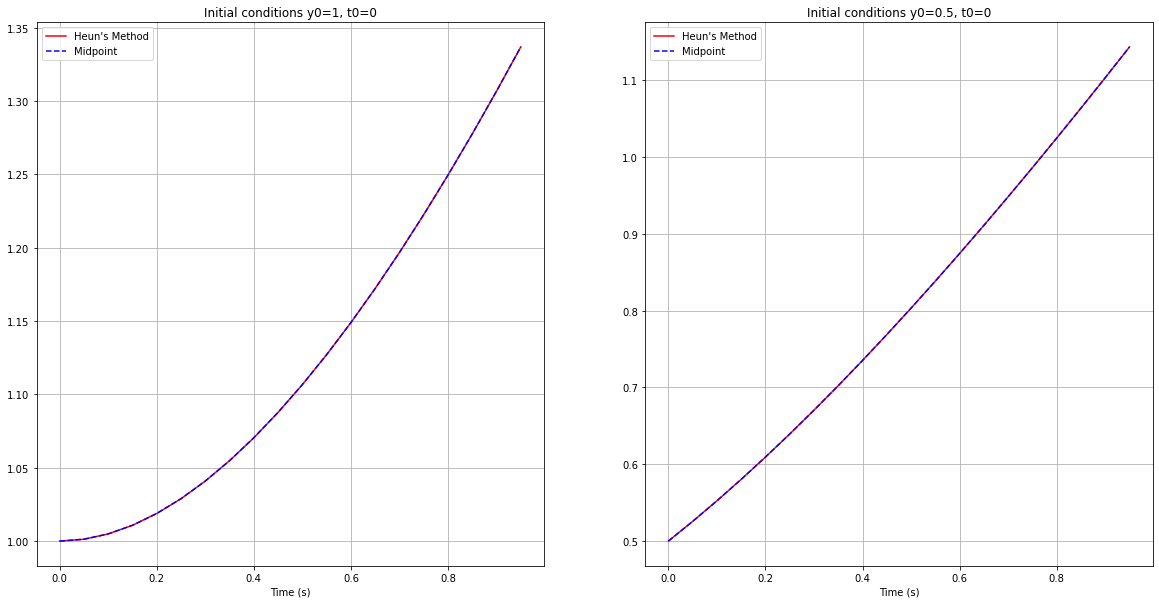

In [9]:
#First set of initial conditions (initialVals1) is the same conditions that we have used in previous examples y0=1, t0=0
#The second set of initial conditions (initialVals2) has y0=0.5 and t0=0.

initialVals1={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.05,'c1':-1.,'c2':1.,'c3':1.} #C1, C2 and C3 as described above to match the equation for this question
initialVals2={'yinitial': 0.5,'t_beg':0.,'t_end':1.,'dt':0.05,'c1':-1.,'c2':1.,'c3':1.}

#I would love to be able to itterate through these calculations, but the first couple of attempts I made to do that did not work...so for now I just copied and and pasted it is.

#Performing the calculations for the first set of initial values
coeff = initinter41(initialVals1)
timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
timeVec1=timeVec
nsteps=len(timeVec)
yhe1=[]
ym1=[]
y=coeff.yinitial
yhe1.append(coeff.yinitial)
ym1.append(coeff.yinitial)
for i in np.arange(1,nsteps):
    ynew=heuninter41(coeff,y,timeVec[i-1])
    yhe1.append(ynew)
    ynew=midpointinter41(coeff,y,timeVec[i-1])
    ym1.append(ynew)
    y=ynew

#Performing the calculations for the second set of initial values
coeff = initinter41(initialVals2)
timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
timeVec2=timeVec
nsteps=len(timeVec)
yhe2=[]
ym2=[]
y=coeff.yinitial
yhe2.append(coeff.yinitial)
ym2.append(coeff.yinitial)
for i in np.arange(1,nsteps):
    ynew=heuninter41(coeff,y,timeVec[i-1])
    yhe2.append(ynew)
    ynew=midpointinter41(coeff,y,timeVec[i-1])
    ym2.append(ynew)
    y=ynew

#Plotting the resulting functions side by side

figHM, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.plot(timeVec1,yhe1,"r-",label="Heun's Method")
ax1.plot(timeVec1,ym1,"b--", label="Midpoint")
ax1.set_xlabel("Time (s)")
ax1.grid("on")
ax1.legend(loc='best')
ax1.set_title("Initial conditions y0=1, t0=0")

ax2.plot(timeVec2,yhe2,"r-",label="Heun's Method")
ax2.plot(timeVec2,ym2,"b--", label="Midpoint")
ax2.set_xlabel("Time (s)")
ax2.grid("on")
ax2.legend(loc='best')
ax2.set_title("Initial conditions y0=0.5, t0=0")

For both midpoint and heun's method there is no visible difference in the graphs created for the initial condition of y0=1, t0=0 and the initial conditions of y0=0.5, t0=0.

<h4> should there be a difference?  </h4>

There should not be a difference between Heun's and the midpoint method because ultimately the equation for $y_{n=1}$ is the same for both methods, as shown below.

For the midpoint method the equations are: 

$k_1 =  h f(y_n,t_n)$ \
$k_2 = h f(y_n+\frac{1}{2}k_1, t_n+\frac{1}{2}h)$ \
$y_{n+1} = y_n + k_2$ 


For Heun's method the equations are:

$k_1 =  h f(y_n,t_n)$ \
$k_2 = h f(y_n+\frac{2}{3}k_1, t_n+\frac{2}{3}h)$ \
$y_{n+1} = y_n + \frac{1}{4}k_1 + \frac{3}{4}k_2$

as a reminder the function is $f(y,t) = t - y  + 1.0$

For both methods $k_1$ would be the same $k_1=h(t_n-y_n+1.0)=ht_n-hy_n+h$ \
for the midpoint method \
$k_2=h f(y_n+\frac{1}{2}h(t_n-y_n+1.0), t_n+\frac{1}{2}h)$ \
$k_2= h f(y_n+\frac{1}{2}ht_n-\frac{1}{2}hy_n+\frac{1}{2}h), t_n+\frac{1}{2}h)$\
$k_2= h(t_n+\frac{1}{2}h-(y_n+\frac{1}{2}ht_n-\frac{1}{2}hy_n+\frac{1}{2}h)+1.0)$\
$k_2=t_nh+\frac{1}{2}h^2-y_nh-\frac{1}{2}h^2t_n+\frac{1}{2}h^2y_n-\frac{1}{2}h^2+h$ \
$k_2=t_nh+-y_nh-\frac{1}{2}h^2t_n+\frac{1}{2}h^2y_n+h$ \
and for heun's method \
$k_2 = h f(y_n+\frac{2}{3}h(t_n-y_n+1.0), t_n+\frac{2}{3}h))$ \
$k_2 = h(t_n+\frac{2}{3}h-(y_n+\frac{2}{3}h(t_n-y_n+1.0))+1.0)$ \
$k_2 = ht_n+\frac{2}{3}h^2-y_nh-\frac{2}{3}h^2(t_n-y_n+1.0)+h)$ \
$k_2 = ht_n+\frac{2}{3}h^2-y_nh-\frac{2}{3}h^2t_n+\frac{2}{3}h^2y_n-\frac{2}{3}h^2+h$ \
$k_2 = ht_n+-y_nh-\frac{2}{3}h^2t_n+\frac{2}{3}h^2y_n+h$ 

And finally, for the midpoint method \
$y_{n=1}= y_n + k_2 =y_n+ t_nh+-y_nh-\frac{1}{2}h^2t_n+\frac{1}{2}h^2y_n+h$


for heun's method  
$y_{n+1} = y_n + \frac{1}{4}k_1 + \frac{3}{4}k_2=y_n=\frac{1}{4}(ht_n-hy_n+h)+\frac{3}{4}(ht_n+-y_nh-\frac{2}{3}h^2t_n+\frac{2}{3}h^2y_n+h)$ \
$y_{n+1}=y_n+t_nh-y_nh-\frac{1}{2}h^2t_n+\frac{1}{2}h^2y_n+h$



 


<h2> Coding Problem C </h2>

1.  Solve the Newtonian cooling equation of lab 1 by any of the above methods. 

2.  Add cells that do this and also generate some plots, showing your along with the parameter values and initial conditions.

The equation for neutonian cooling is:
$\frac{dT}{dt}=- \lambda (T,t) (T-T_a)$ \
Assuming $\lambda$ is constant then the equation is $\frac{dT}{dt}=- \lambda T + \lambda T_a$. Which can be put in the form of the initinter41 function from the lab. 
Let $\lambda=10^{-5} sec^{-1}$, and $T_a=20$ degrees C

Then $c_1=-10^{-5}, c_2=0, and,  c_3=Ta*10^{-5}$ 

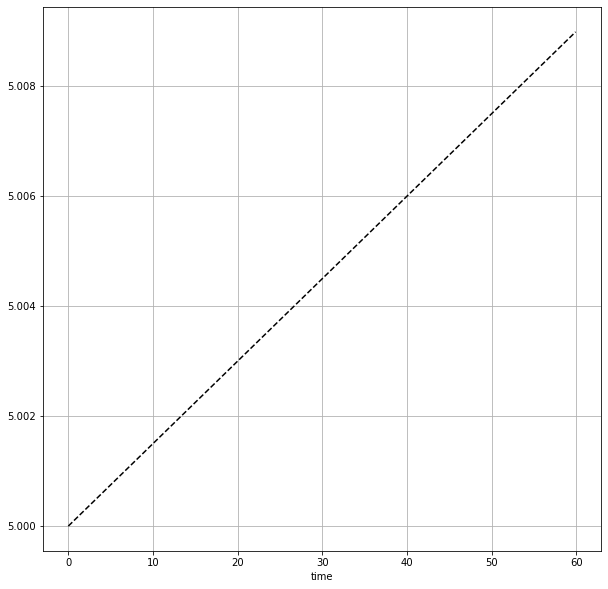

In [10]:
#Solve the equations with the midpoint method

#Set initial values as described in the text above.
initialVals={'yinitial': 5,'t_beg':0.,'t_end':60.,'dt':0.1,'c1':-10**-5.,'c2':0,'c3':20*10**-5}
coeff = initinter41(initialVals)

timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)
yhe=[]
ym=[]
y=coeff.yinitial
yhe.append(coeff.yinitial)
ym.append(coeff.yinitial)
for i in np.arange(1,nsteps):
    ynew=midpointinter41(coeff,y,timeVec[i-1])
    ym.append(ynew)
    y=ynew

#Create plot of the function    

figCool, (ax1)=plt.subplots(1,1,figsize=(10,10))
ax1.plot(timeVec,ym,"k--",label="Midpoint")
ax1.set_xlabel("time")
ax1.grid("on")